<a href="https://colab.research.google.com/github/egonik-unlp/labo/blob/main/codigo_seminarios/Seminario_nanoFOT_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Celdas preparativas 

In [ ]:
!pip install agilentaspparser
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
!git clone https://github.com/egonik-unlp/labo.git

--2021-05-10 14:40:52--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41295 (40K) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]  40.33K  --.-KB/s    in 0.003s  

2021-05-10 14:40:52 (12.7 MB/s) - ‘housing.csv’ saved [41295/41295]

Cloning into 'labo'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (419/419), done.
remote: Compressing objects: 100% (293/293), done.
remote: Total 419 (delta 123), reused 401 (delta 111), pack-reused 0
Receiving objects: 100% (419/419), 21.41 MiB | 21.82 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [ ]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import agilentaspparser as asp
from scipy.stats import uniform, loguniform
from scipy.signal import find_peaks
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display as d
from IPython.display import Markdown as md 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, plot_precision_recall_curve, plot_roc_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import load_boston

# Grandes (Grandisimos) datasets.

In [ ]:
!wget https://raw.githubusercontent.com/egonik-unlp/random_projects/master/data_analytics/kaggle.json
!mkdir /root/.kaggle 
!cp kaggle.json /root/.kaggle
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!cd /content/
!kaggle datasets download -d 'epa/hazardous-air-pollutants'
!unzip /content/hazardous-air-pollutants.zip -d /content/dataset


--2021-05-10 14:41:04--  https://raw.githubusercontent.com/egonik-unlp/random_projects/master/data_analytics/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      68  --.-KB/s    in 0s      

2021-05-10 14:41:05 (2.59 MB/s) - ‘kaggle.json’ saved [68/68]

100% 556M/558M [00:05<00:00, 67.5MB/s]
100% 558M/558M [00:05<00:00, 103MB/s] 
Archive:  /content/hazardous-air-pollutants.zip
  inflating: /content/dataset/epa_hap_daily_summary.csv  


In [ ]:
# Es muy pesado de cargar, lo pongo en una celda individual para asegurarme de que no se corra dos veces
df = pd.read_csv('dataset/epa_hap_daily_summary.csv', parse_dates= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


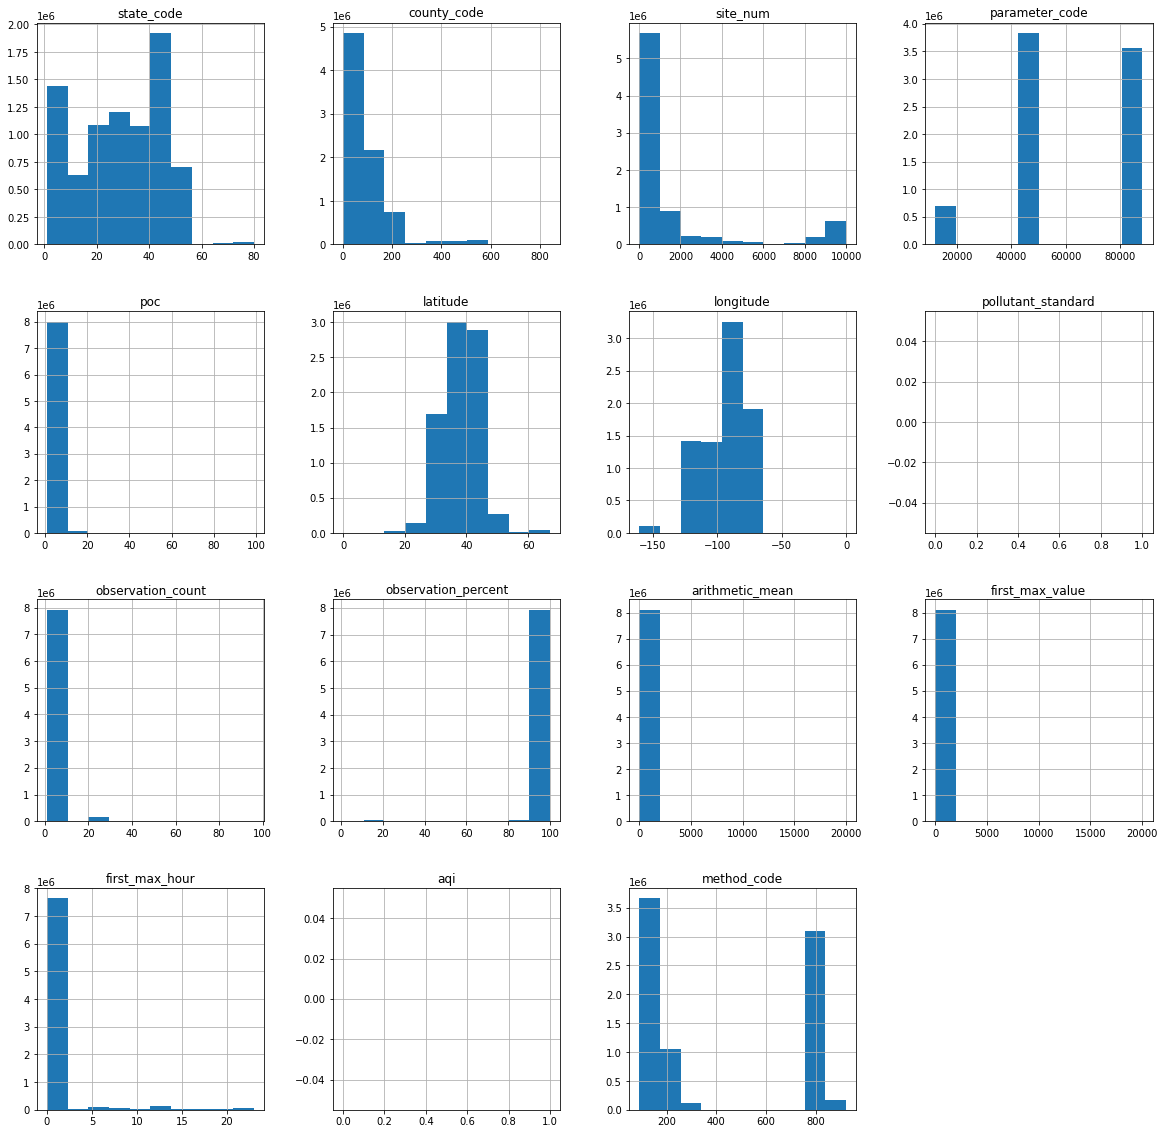

In [ ]:
plt.figure(figsize = (20,20))
hist = df.hist(ax = plt.gca())

In [ ]:
df.describe()

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code
count,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,0.0,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,8.097069e+06,0.0,8.097069e+06
mean,2.930571e+01,8.995137e+01,1.370898e+03,6.042453e+04,2.835583e+00,3.818801e+01,-9.434529e+01,NaN,1.572091e+00,9.880965e+01,4.466537e-01,5.618971e-01,7.211276e-01,NaN,4.101036e+02
std,1.635628e+01,1.008587e+02,2.746745e+03,2.560563e+04,2.905911e+00,5.968574e+00,1.716207e+01,NaN,3.434705e+00,8.590761e+00,1.247981e+01,1.306216e+01,3.240937e+00,NaN,3.298626e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.210300e+04,1.000000e+00,0.000000e+00,-1.605083e+02,NaN,1.000000e+00,1.000000e+00,-1.000000e-01,-1.000000e-01,0.000000e+00,NaN,8.900000e+01
25%,1.600000e+01,2.700000e+01,8.000000e+00,4.380400e+04,1.000000e+00,3.394471e+01,-1.066766e+02,NaN,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.160000e+02
50%,2.800000e+01,6.300000e+01,4.200000e+01,4.386000e+04,1.000000e+00,3.892185e+01,-9.278027e+01,NaN,1.000000e+00,1.000000e+02,8.900000e-04,8.900000e-04,0.000000e+00,NaN,1.750000e+02
75%,4.500000e+01,1.190000e+02,1.007000e+03,8.811200e+04,5.000000e+00,4.219438e+01,-8.096230e+01,NaN,1.000000e+00,1.000000e+02,4.000000e-02,4.000000e-02,0.000000e+00,NaN,8.000000e+02
max,8.000000e+01,8.400000e+02,9.998000e+03,8.813600e+04,9.900000e+01,6.709195e+01,0.000000e+00,NaN,9.600000e+01,1.000000e+02,2.000000e+04,2.000000e+04,2.300000e+01,NaN,9.230000e+02


# Python como ecosistema para análisis de datos

In [ ]:
plt.style.use("ggplot")

/content/labo/2021/ir/datos_ir/colo


(4000.0, 650.0)

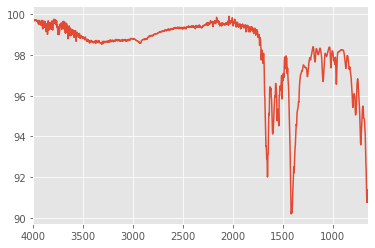

In [ ]:
plt.style.use('ggplot')

%cd /content/labo/2021/ir/datos_ir/colo
spectra = asp.load_dir('.')
mof90 = spectra.as_pandas()['mof90_2021-04-28T16-55-48']
mof90.plot()
plt.xlim(4000,650)

In [ ]:
peaks = find_peaks(100- mof90.values, height = 2.5, width = 5)[0]

(4000.0, 650.0)

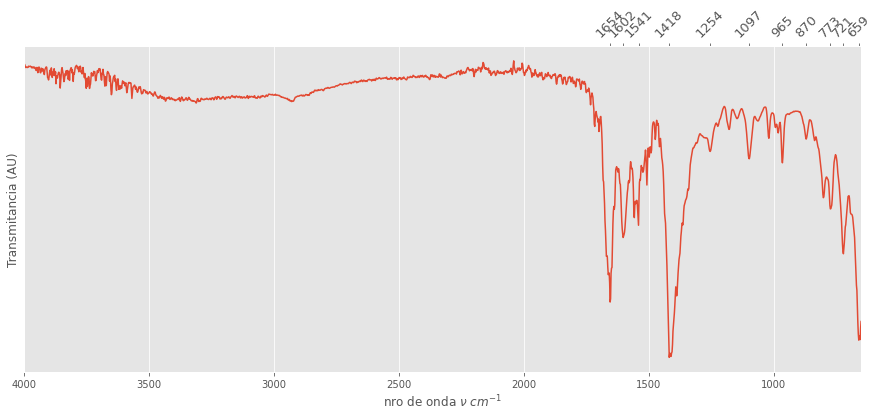

In [ ]:
fig = plt.figure(figsize = (15,6))
plt.plot(mof90)
plt.xlabel(r'nro de onda $\nu$ $cm^{-1}$')
plt.ylabel('Transmitancia (AU)')
plt.yticks([])
sax = plt.gca().secondary_xaxis('top')
sax.set_xticks(mof90.iloc[peaks].index)
sax.set_xticklabels(mof90.iloc[peaks].index.astype(int), rotation = 45, fontsize = 13)
plt.xlim(4000,650)


### Otros gráficos

/content/labo/2021/tau
70
51
258


<Figure size 576x432 with 0 Axes>

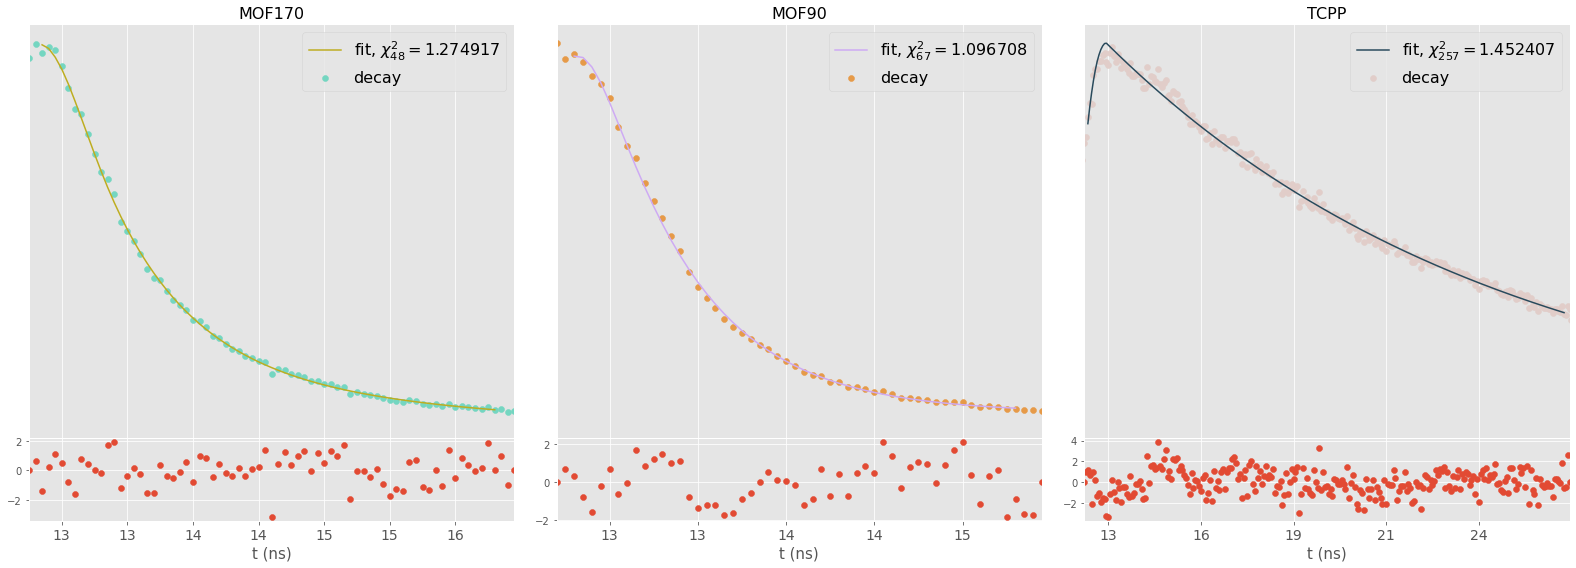

In [ ]:

%cd /content/labo/2021/tau

fd = [(48, 1.274917),(67, 1.096708),(257, 1.452407) ]
fig = plt.figure(figsize= (8,6))
lt = [pd.read_csv(file, sep = '\t') for file in os.listdir() if '.txt' in file and 'meta' not in file]
names = [file[:-4] for file in os.listdir() if '.txt' in file and 'meta' not in file]
fig, ax = plt.subplots(ncols = 3, figsize = (22, 8))
for i, dataframe in enumerate(lt):
  r,g,b = np.random.random(size = 3)
  dataframe.drop(columns = 'Chan', inplace = True)
  index = dataframe.index.to_numpy()
  data = dataframe.to_numpy()
  peak_info = find_peaks(data[:,2], height= 0, width = 0)[1]
  lm, rm = peak_info['left_bases'][0], peak_info['right_bases'][0]
  ax[i].set_title(f'{names[i].upper()}', fontsize = 16)
  ax[i].scatter(index, data[:, 1], label = 'decay' ,color = (r,g,b))
  ax[i].plot(index[lm + 2:rm - 2], data[lm + 2 :rm -2 ,2], label = r'fit, $\chi^2_{%d} = {%f}$'%(fd[i]), color = np.random.random(size = 3))
  print(len(index[lm + 2:rm - 2]))
  # ax[i].semilogy()
  ax[i].set
  ax[i].set_yticks([])
  # plt.ylim(bottom = data[rm,2])
  ax[i].set_xlim((lm, rm))
  ax[i].legend(fontsize = 16)
  # ax[i].set_xticklabels(ax[i].get_xticks() * 0.05486969)
  # ax[i].text(lm + 10, 10,'jumbo', horizontalalignment = 'right')
  divider = make_axes_locatable(ax[i])
  ax2 = divider.append_axes('bottom', size = '20%', pad = 0)
  ax2.scatter(index, data[:,-1])
  ax2.set_xlim(ax[i].get_xlim())
  ax2.set_xticklabels([ int(i) for i in ax[i].get_xticks() * 0.05486969], fontsize = 14)
  ax2.set_xlabel('t (ns)', fontsize = 15)
  plt.savefig('tau.png')
plt.tight_layout()
plt.show()


/content/labo/2021/abs


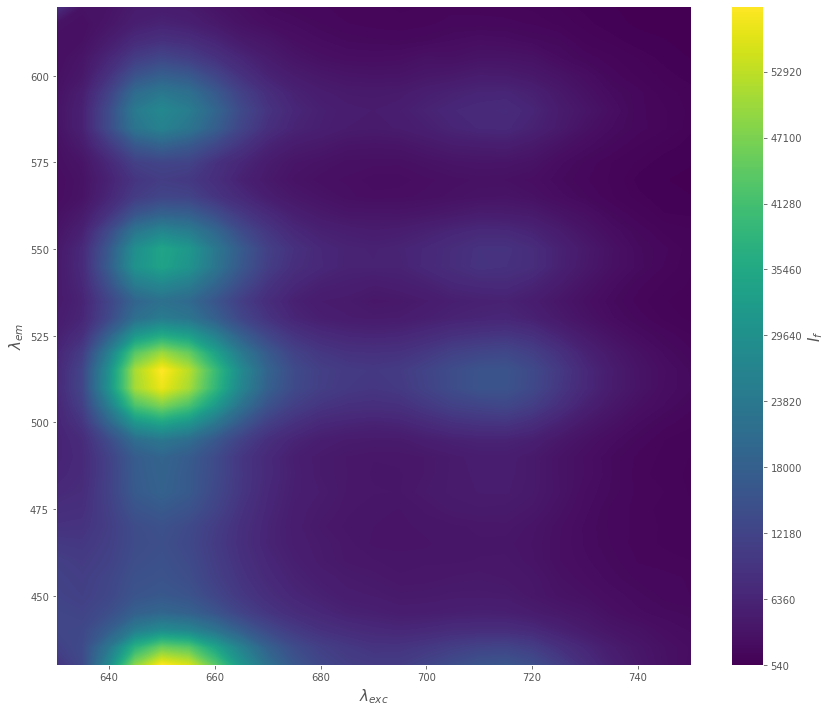

In [ ]:
fig = plt.figure(figsize=(12,10))
%cd /content/labo/2021/abs 
df = pd.read_csv('zrnmof.csv')
df = df.pivot('EM wavelength', 'EX wavelength', 'A1c/R1c')

plot = plt.contourf(df.index, df.columns, df.T.to_numpy(),levels = 1000, cmap = 'viridis')
cbr = fig.colorbar(plot)
cbr.set_label('$I_f$', fontsize = 15)
plt.xlabel('$\lambda_{exc}$', fontsize = 15)
plt.ylabel('$\lambda_{em}$', fontsize = 15)
plt.savefig('eem.png')
plt.tight_layout()
plt.show()


# Algoritmos interesantes para regresión y clasificación.


In [ ]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.serif'] = 'Helvetica'

## Dataset Boston Housing Prices (Regresión)

In [ ]:
data = load_boston()
d(md(data.DESCR))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


In [ ]:
X,t = data.data[:,:-1], data.data[:,-1:]
X_train, X_test, t_train,t_test = train_test_split(X,t,test_size = .2, random_state = 42)
X.shape

(506, 12)

In [ ]:
X_train.shape, X_test.shape

((404, 12), (102, 12))

In [ ]:
modelo = Pipeline([
                   ('scaler', StandardScaler()),
                   ('poly', PolynomialFeatures()),
                   ('ridge', Ridge(fit_intercept= False) )
])
hyperparams= {'ridge__alpha': np.logspace(-3,2,10), 'poly__degree': [i for i in range(1,8)]}
grilla = GridSearchCV(modelo, hyperparams,refit=True)
grilla.fit(X_train, t_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=False,
                                              max_iter=None, normalize=False,
                                           

In [ ]:
grilla.best_params_

{'poly__degree': 2, 'ridge__alpha': 27.825594022071257}

In [ ]:
z = grilla.cv_results_['mean_test_score'].ravel()
y_g = grilla.cv_results_['param_ridge__alpha'].data.reshape(-1,1).ravel()
x_g = grilla.cv_results_['param_poly__degree'].data.reshape(-1,1).ravel()


In [ ]:
el_mejor = grilla.best_estimator_
yhat_tr = el_mejor.predict(X_train)
yhat_test =  el_mejor.predict(X_test)

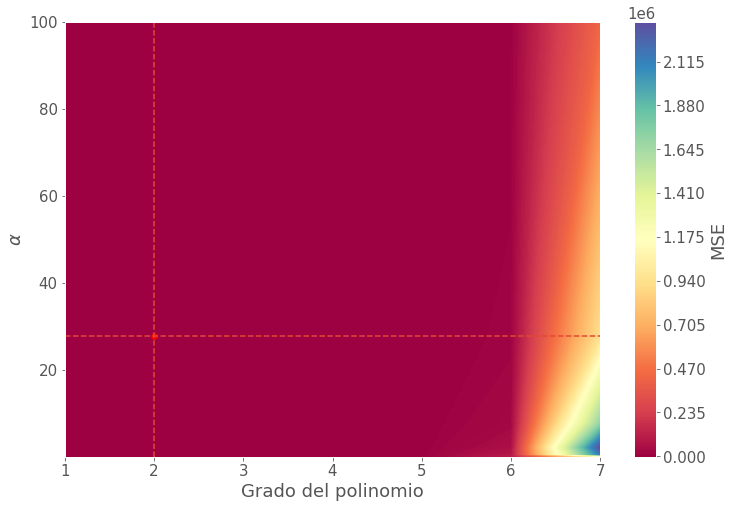

In [ ]:
z = grilla.cv_results_['mean_test_score'].ravel()
y_g = grilla.cv_results_['param_ridge__alpha'].data.reshape(-1,1).ravel()
x_g = grilla.cv_results_['param_poly__degree'].data.reshape(-1,1).ravel()
bestparams = list(grilla.best_params_.values())
df = pd.DataFrame([x_g,y_g,-z]).T
df.columns = ['grado', 'alfa', 'mse']
data = df.pivot('grado', 'alfa', 'mse')
fig1 = plt.figure(figsize = (12,8))
plot = plt.contourf(data.index,data.columns, data.T.to_numpy(), levels = 1000, cmap = 'Spectral')
plt.scatter(*bestparams, c = 'r')
plt.axhline(bestparams[1], ls = '--')
plt.axvline(bestparams[0], ls = '--')
plt.xlabel('Grado del polinomio')
plt.ylabel(r'$\alpha$')
cbar = fig1.colorbar(plot)
cbar.ax.set_ylabel('MSE')
# Add the contour line levels to the colorbar
plt.show()


In [ ]:
d(md(data.to_markdown()))

|   grado |        0.001 |   0.003593813663804626 |   0.01291549665014884 |   0.046415888336127795 |   0.1668100537200059 |   0.5994842503189409 |   2.1544346900318843 |   7.742636826811277 |   27.825594022071257 |         100.0 |
|--------:|-------------:|-----------------------:|----------------------:|-----------------------:|---------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------:|
|       1 |    -0.618626 |              -0.618627 |             -0.61863  |              -0.618643 |         -0.618687    |         -0.618832    |         -0.619204    |        -0.618863    |           -0.601926  |     -0.4384   |
|       2 |    -0.306258 |              -0.313996 |             -0.330091 |              -0.361537 |         -0.408706    |         -0.469751    |         -0.547394    |        -0.627749    |           -0.661623  |     -0.611015 |
|       3 |    29.0364   |              23.7664   |             27.4193   |              27.5576   |         26.6374      |         21.3441      |         10.8496      |         2.78308     |           -0.0976869 |     -0.481444 |
|       4 |   251.028    |             170.738    |            115.986    |             103.84     |         58.0981      |         15.7252      |         39.3274      |        84.7219      |           81.7138    |     38.6943   |
|       5 |   215.742    |             272.017    |            540.538    |            1174.5      |       1704.28        |       1632.85        |        954.843       |       292.797       |           42.3985    |    178.725    |
|       6 | 81916.8      |           83692.8      |          88794.9      |           98114.1      |     101719           |      85677.6         |      56457           |     28674.7         |        10085.4       |   2555.25     |
|       7 | 83200.8      |           97684.9      |         159206        |          425752        |          1.19736e+06 |          2.13975e+06 |          2.32713e+06 |         1.70463e+06 |       937471         | 426447        |

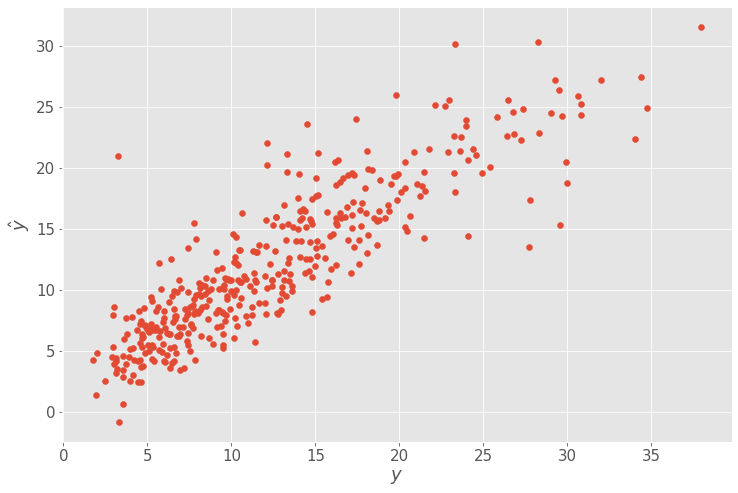

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(t_train, yhat_tr)
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.show()

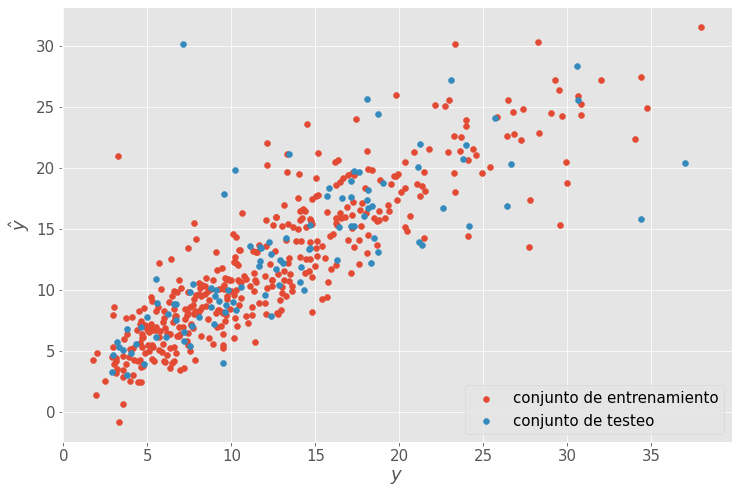

#### $MSE_{testeo}$1.7244

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(t_train, yhat_tr, label = 'conjunto de entrenamiento')
plt.scatter(t_test, yhat_test, label = 'conjunto de testeo')
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.legend()
plt.show()
d(md(r'#### $MSE_{testeo}$' f'{np.sqrt(mean_absolute_error(t_test, el_mejor.predict(X_test))):0.4f}'))


In [ ]:
modelo = Pipeline([
                   ('scaler', StandardScaler()),
                   ('poly', PolynomialFeatures()),
                   ('ridge', Ridge(fit_intercept= False, normalize = True) )
])
random_hyperparams = {'poly__degree': [i for i in range(1,11)], 'ridge__alpha' : loguniform(1e-6,1e2)}
random_grilla = RandomizedSearchCV(modelo, random_hyperparams, refit = True)
random_grilla.fit(X_train, t_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.67431e-20): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.93883e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.02295e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.82087e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.47374e-18): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarn

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('poly',
                                              PolynomialFeatures(degree=2,
                                                                 include_bias=True,
                                                                 interaction_only=False,
                                                                 order='C')),
                                             ('ridge',
                                              Ridge(alpha=1.0, copy_X=True,
                                                    fit_intercept=False,
                                     

In [ ]:
z = random_grilla.cv_results_['mean_test_score'].ravel()
y_g = random_grilla.cv_results_['param_ridge__alpha'].data.reshape(-1,1).ravel()
x_g = random_grilla.cv_results_['param_poly__degree'].data.reshape(-1,1).ravel()
bestparams = list(random_grilla.best_params_.values())
df = pd.DataFrame([x_g,y_g,-z]).T
df.columns = ['grado', 'alfa', 'mse']
data = df.pivot('grado', 'alfa', 'mse')

In [ ]:
d(md(data.to_markdown()))

|   grado |   5.3110016503627955e-06 |   7.123996471382091e-05 |   7.51991757686997e-05 |   0.02576973660682962 |   0.02873824006369245 |   0.1969231604912434 |   1.969060006502122 |   42.47435745148776 |   54.76076790247328 |   67.47301879716191 |
|--------:|-------------------------:|------------------------:|-----------------------:|----------------------:|----------------------:|---------------------:|--------------------:|--------------------:|--------------------:|--------------------:|
|       2 |                  nan     |                     nan |              -0.301489 |         nan           |             -0.347708 |        nan           |            nan      |              nan    |       nan           |            nan      |
|       3 |                  381.393 |                     nan |             nan        |         nan           |            nan        |        nan           |             11.5945 |              nan    |       nan           |            nan      |
|       4 |                  nan     |                     nan |             nan        |         nan           |            nan        |        nan           |            nan      |              nan    |       nan           |             52.0991 |
|       6 |                  nan     |                   81234 |             nan        |         nan           |            nan        |        nan           |            nan      |             6619.29 |       nan           |            nan      |
|       8 |                  nan     |                     nan |             nan        |           7.29117e+06 |            nan        |          1.92939e+07 |            nan      |              nan    |       nan           |            nan      |
|      10 |                  nan     |                     nan |             nan        |         nan           |            nan        |        nan           |            nan      |              nan    |         1.20398e+10 |            nan      |

In [ ]:
random_grilla.best_params_

{'poly__degree': 2, 'ridge__alpha': 0.02873824006369245}

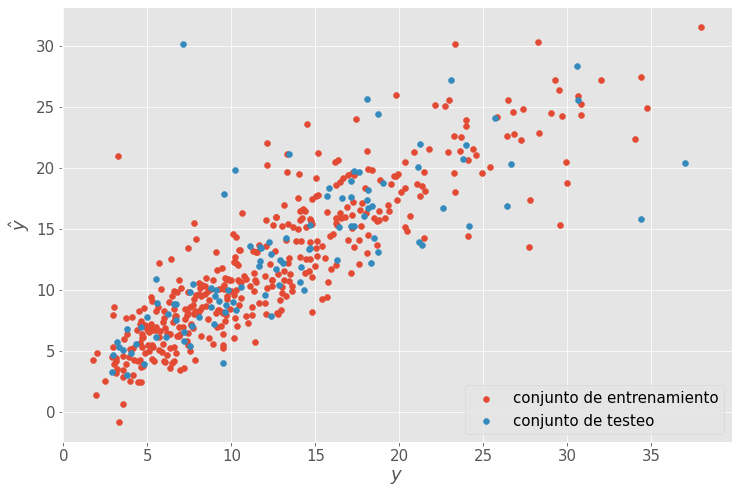

#### $MSE_{testeo}$1.7571

In [ ]:
plt.figure(figsize = (12,8))
el_mejor = random_grilla.best_estimator_
plt.scatter(t_train, yhat_tr, label = 'conjunto de entrenamiento')
plt.scatter(t_test, yhat_test, label = 'conjunto de testeo')
plt.xlabel(r'$y$')
plt.ylabel(r'$\hat{y}$')
plt.legend()
plt.show()
d(md(r'#### $MSE_{testeo}$' f'{np.sqrt(mean_absolute_error(t_test, el_mejor.predict(X_test))):0.4f}'))


## Dataset Breast Cancer (Clasificación)

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
d(md(cancer.DESCR))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [ ]:
X,t = cancer.data, cancer.target
X_train, X_test, t_train, t_test = train_test_split(X,t, test_size = .2, random_state = 42)

In [ ]:
lr = LogisticRegression(fit_intercept= True, max_iter=100000)
Phi = np.hstack([np.ones(shape = X_train.shape[0]).reshape(-1,1), X_train])
Phi_test = np.hstack([np.ones(shape = X_test.shape[0]).reshape(-1,1), X_test])

lr.fit(Phi, t_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

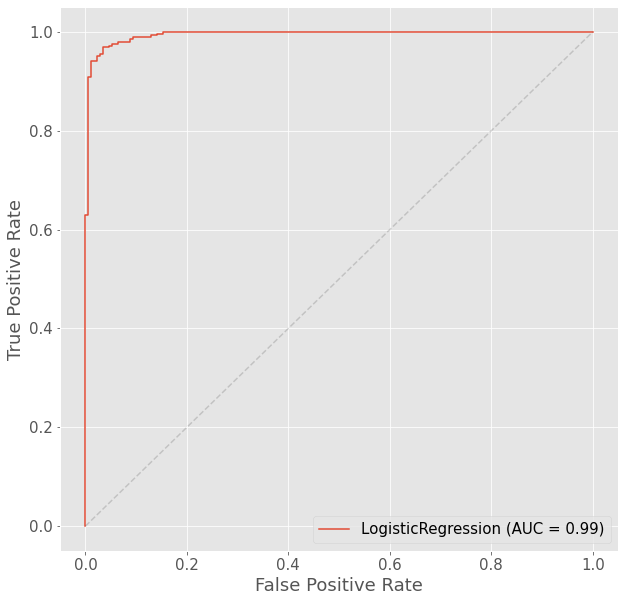

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plot_roc_curve(lr, Phi, t_train, ax = ax)
ax.plot([0,1],[0,1], ls = '--', c = 'black', alpha = .15)

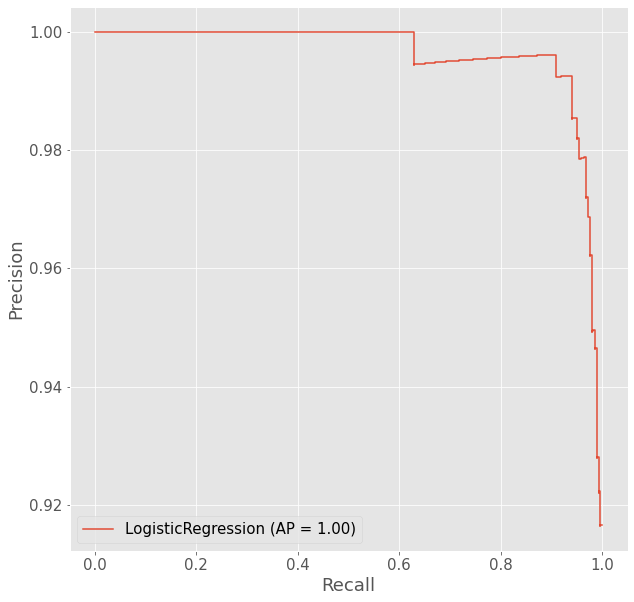

In [ ]:
plt.figure(figsize=(10,10))
plot_precision_recall_curve(lr, Phi, t_train, ax = plt.gca())
plt.show()

In [ ]:
print(f'Precision en conjunto de entrenamiento {cross_val_score(lr, Phi, t_train, scoring = "accuracy").mean():0.3f}' )
print(f'Precision en conjunto de testeo {cross_val_score(lr, X_test, t_test, scoring = "accuracy").mean():0.3f}')

Precision en conjunto de entrenamiento 0.954
Precision en conjunto de testeo 0.956


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Phi_pca = pca.fit_transform(Phi)
lr_pca = LogisticRegression(fit_intercept=False)
lr_pca.fit(Phi_pca, t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

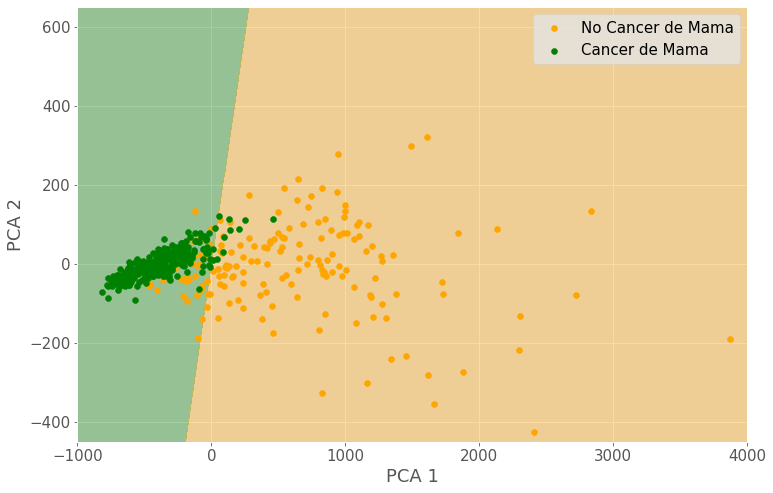

In [ ]:
plt.figure(figsize = (12,8))

pca1 = np.linspace(-500, 650, 2000)
pca2 = np.linspace(-1000, 4000, 2000)
pca1_toplot, pca2_toplot = np.meshgrid(pca1,pca2)
z = lr_pca.predict(np.c_[pca1_toplot.ravel(), pca2_toplot.ravel()]).reshape(pca1_toplot.shape)
plt.contourf(pca2_toplot,pca1_toplot,z, levels=[0.0,0.5,1.0], colors = ['green', 'orange'], alpha = .35)
plt.xlim(-1000, 4000)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.ylim(-450,650)
plt.scatter(Phi_pca[t_train==0,0],Phi_pca[t_train==0,1], c='orange', label="No Cancer de Mama")
plt.scatter(Phi_pca[t_train==1,0],Phi_pca[t_train==1,1], c='green', label="Cancer de Mama")
plt.legend()
plt.savefig('breast_cancer.png')
plt.show()